In [48]:
# https://www.kaggle.com/mlg-ulb/creditcardfraud
# pip install -U imbalanced-learn
# conda install -c conda-forge imbalanced-learn

#example of imbalanced data sets

from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
dfData = pd.read_csv("credit/creditcard.csv")

#creating the feature set with X and y
#y is our "Class"
#define y as Class column
y = dfData["Class"]
print(dfData.columns)

#then drop class and make for a new dfData
dfData = dfData.drop("Class",axis=1)
#use dfData
X = dfData.copy()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [41]:
#now without the Class column (because it's our X)
dfData.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [42]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [35]:
#showing whether it's a fraud (0)or not (1)
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [49]:
#starting with StratifiedShuffleSplit
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(X, y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

In [50]:
print("Label distribution:\n", y_train.value_counts()/y_train.count()*100)
print("Number of instances:", y_train.count())

Label distribution:
 Class
0    99.827075
1     0.172925
Name: count, dtype: float64
Number of instances: 227845


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

def crossValData(X_train, y_train):
    log_reg = LogisticRegression(C=1e5)

    results = cross_validate(log_reg,
                             X = X_train,
                             y = y_train,
                             scoring = ["accuracy", "recall", "f1", "roc_auc"],#no need for macro or so here, only 2 labels (binary classification)
                             #https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                             cv = 3,
                             n_jobs = -1,
                             verbose = True,
                             return_train_score = True,
                             return_estimator = True)
    return results

results = crossValData(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

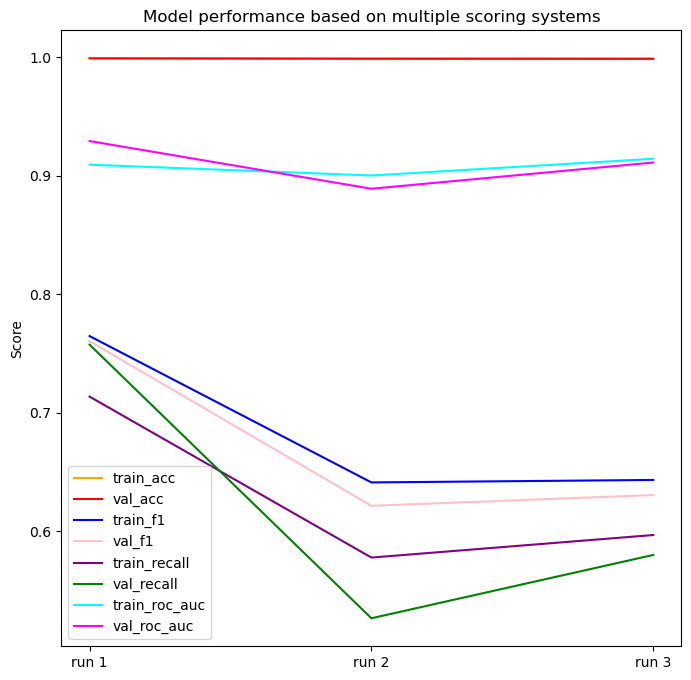

In [52]:
import matplotlib.pyplot as plt
def visualizeResults(results):

    #call the scores writing function "results" + test_ or train_
    #"val" represents "test"
    cvData = {"val_f1":results["test_f1"],
            "train_f1":results["train_f1"],
            "val_recall":results["test_recall"],
            "train_recall":results["train_recall"],
            "val_acc":results["test_accuracy"],
            "train_acc":results["train_accuracy"],
            "val_roc_auc":results["test_roc_auc"],
            "train_roc_auc":results["train_roc_auc"]}

    dfCV = pd.DataFrame(cvData)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot()

    #"val" represents "test"
    plt.plot(dfCV.index,dfCV["train_acc"],label="train_acc", color="orange")
    plt.plot(dfCV.index,dfCV["val_acc"],label="val_acc", c="r")
    plt.plot(dfCV.index,dfCV["train_f1"],label="train_f1", c="b")
    plt.plot(dfCV.index,dfCV["val_f1"],label="val_f1", c="pink")
    plt.plot(dfCV.index,dfCV["train_recall"],label="train_recall", c="purple")
    plt.plot(dfCV.index,dfCV["val_recall"],label="val_recall", c="g")
    plt.plot(dfCV.index,dfCV["train_roc_auc"],label="train_roc_auc", c="cyan")
    plt.plot(dfCV.index,dfCV["val_roc_auc"],label="val_roc_auc", c="magenta")
    plt.legend()
    plt.ylabel("Score")
    plt.title("Model performance based on multiple scoring systems")
    plt.xticks(range(len(results["fit_time"])),["run "+str(i+1) for i in range(len(results["fit_time"]))])
    plt.show()
visualizeResults(results)

Label distribution: Class
0    50.0
1    50.0
Name: count, dtype: float64
Number of instances: 788


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished


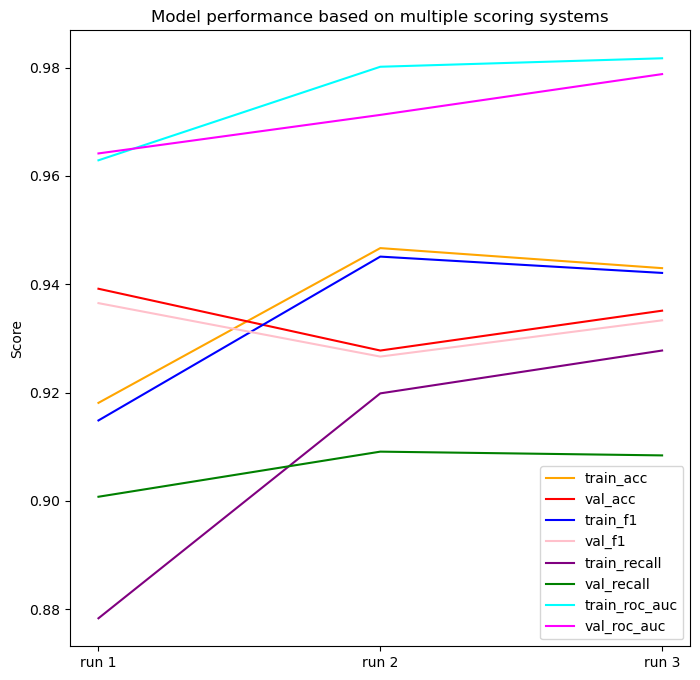

In [53]:
#making our samples more equal using RandomUnderSampler
#making our true and false labels more comparable according to their scales

from imblearn.under_sampling import RandomUnderSampler
#undersample majority class to create equal distribution of classes
rand_res = RandomUnderSampler()
X_train_res, y_train_res = rand_res.fit_resample(X_train, y_train) #fit_resample: resampling function
print("Label distribution:", y_train_res.value_counts()/y_train_res.count()*100)
print("Number of instances:", y_train_res.count())
results_res = crossValData(X_train_res, y_train_res)
visualizeResults(results_res)

#result: even 50:50 split
#number of samples cut down to 788 (instead of over 22k)
#now our ML algorithm isn't affected by a bunch of negatives
#most scores are now in the 90 region while before it had been between 60 and 80

## Comparing predictions of the last two estimators

In [55]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

#comparing the estimator that didn't use any resampling technique to the resampling estimator
#estimator is a given access key in sklearn!
def compareResults(X_test, y_test, results, results_res, resType=""):
    y_pred = results["estimator"][-1].predict(X_test) #looking at the last estimator -1
    y_pred_rus = results_res["estimator"][-1].predict(X_test)
    precision,recall,fscore,support = precision_recall_fscore_support(y_true=y_test, 
                                                                      y_pred=y_pred)

    roc_auc = roc_auc_score(y_true=y_test, 
                            y_score=y_pred)
    print("No special sampling")
    print("precision:",round(precision[1],3))
    print("recall:",round(recall[1],3))
    print("fscore:",round(fscore[1],3))
    print("roc_auc:",round(roc_auc,3))
    print("Accuracy:",round(results["estimator"][-1].score(X_test, y_test),3))
    print()
    precision_rus,recall_rus,fscore_rus,support_rus = precision_recall_fscore_support(y_true=y_test, 
                                                                      y_pred=y_pred_rus)
    roc_auc_rus = roc_auc_score(y_true=y_test, 
                            y_score=y_pred_rus)
    print(resType)
    print("precision:",round(precision_rus[1],3))
    print("recall:",round(recall_rus[1],3))
    print("fscore:",round(fscore_rus[1],3))
    print("roc_auc:",round(roc_auc_rus,3))
    print("Accuracy:",round(results_res["estimator"][-1].score(X_test, y_test),3))
    
compareResults(X_test, y_test, results, results_res, resType="Random under sampling")

No special sampling
precision: 0.727
recall: 0.571
fscore: 0.64
roc_auc: 0.786
Accuracy: 0.999

Random under sampling
precision: 0.04
recall: 0.867
fscore: 0.077
roc_auc: 0.916
Accuracy: 0.964


In [56]:
from sklearn.metrics import confusion_matrix
print("No special sampling")
pd.DataFrame(confusion_matrix(y_true=y_test,y_pred=results["estimator"][-1].predict(X_test),labels=[0,1]),
             columns = ["Pred not fraud","Pred fraud"],
            index = ["not fraud","fraud"])

No special sampling


,Pred not fraud,Pred fraud
not fraud,56843,21
fraud,42,56


In [57]:
print("Random under sampling")
pd.DataFrame(confusion_matrix(y_true=y_test,y_pred=results_res["estimator"][-1].predict(X_test),
                              labels=[0,1]),
             columns = ["Pred not fraud","Pred fraud"],
            index = ["not fraud","fraud"])

Random under sampling


,Pred not fraud,Pred fraud
not fraud,54832,2032
fraud,13,85


Label distribution: Class
0    50.0
1    50.0
Name: count, dtype: float64
Number of instances: 454902


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.4s finished


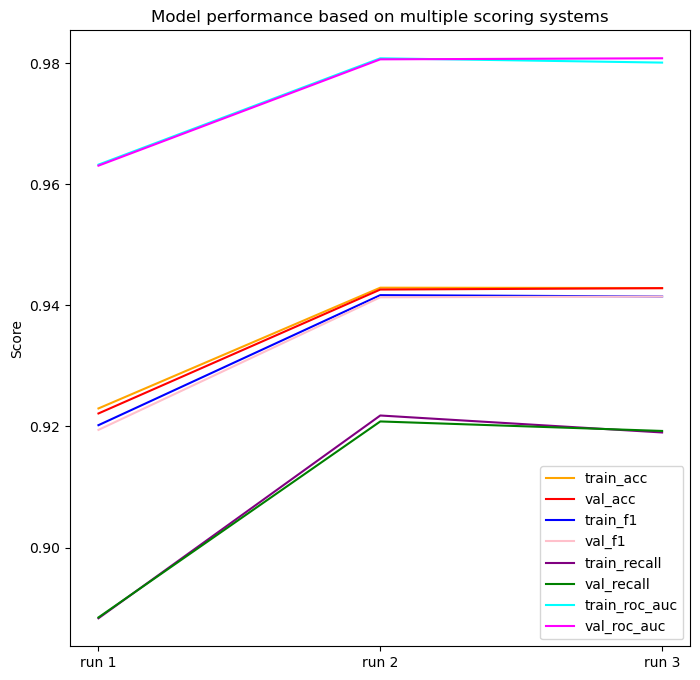

No special sampling
precision: 0.727
recall: 0.571
fscore: 0.64
roc_auc: 0.786
Accuracy: 0.999

Random over sampling
precision: 0.042
recall: 0.867
fscore: 0.08
roc_auc: 0.917
Accuracy: 0.966

Random over sampling
           Pred not fraud  Pred fraud
not fraud           54935        1929
fraud                  13          85


In [58]:
#same thing as before but now trying the over-sampling

from imblearn.over_sampling import RandomOverSampler
#upsample minority class to create equal distribution of classes
rand_over_res = RandomOverSampler()
X_train_over_res, y_train_over_res = rand_over_res.fit_resample(X_train, y_train)

def evaluateResamplingMethod(results, X_train, y_train, X_test, y_test, resType=""):
    print("Label distribution:", y_train.value_counts()/y_train.count()*100)
    print("Number of instances:", y_train.count())


    results_over_res = crossValData(X_train, y_train)

    visualizeResults(results_over_res)
    compareResults(X_test, y_test, results, results_over_res, resType=resType) 

    print("\nRandom over sampling")
    print(pd.DataFrame(confusion_matrix(y_true=y_test,y_pred=results_over_res["estimator"][-1].predict(X_test),
                                  labels=[0,1]),
                 columns = ["Pred not fraud","Pred fraud"],
                index = ["not fraud","fraud"]))
    
evaluateResamplingMethod(results, X_train_over_res, y_train_over_res, X_test, y_test, resType="Random over sampling")

## Be careful of re-sampling technique usages

Label distribution: Class
0    50.0
1    50.0
Name: count, dtype: float64
Number of instances: 454902


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.4s finished


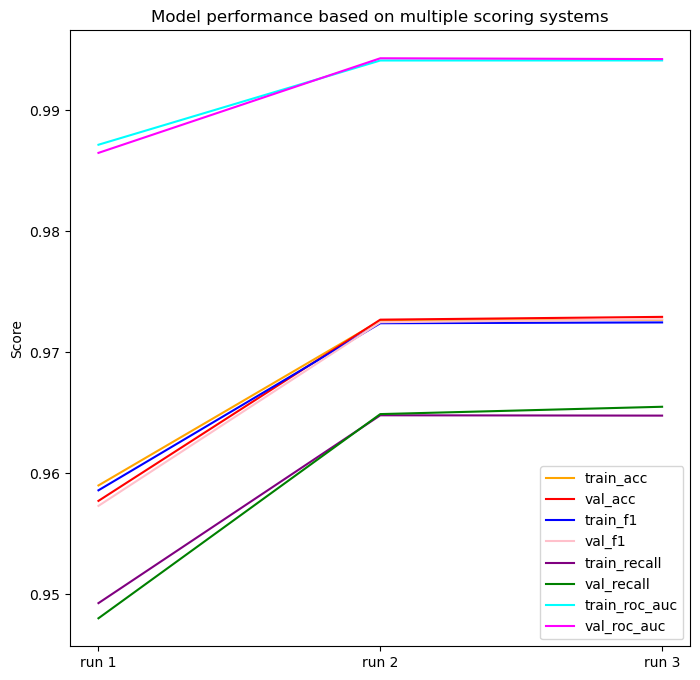

No special sampling
precision: 0.727
recall: 0.571
fscore: 0.64
roc_auc: 0.786
Accuracy: 0.999

Random over sampling
precision: 0.069
recall: 0.867
fscore: 0.128
roc_auc: 0.924
Accuracy: 0.98

Random over sampling
           Pred not fraud  Pred fraud
not fraud           55715        1149
fraud                  13          85


In [59]:
#another kind of over-sampler: SMOTE
#SMOTE: looks for positive classes and does slight manipulations to the nearest neighbors
#creating aritficial (positive synthetic) classes
#we are not looking at the generalization error because the validation set is very similar to the test set

from imblearn.over_sampling import SMOTE
# Create artifical samples finding nearest neighbours + adding some slight disturabances to features
# Thus we can have almost "copies" of training set samples in validation set, improving perceived model performance
sm_over = SMOTE()
X_train_over_smote, y_train_over_smote = sm_over.fit_resample(X_train, y_train)
evaluateResamplingMethod(results, X_train_over_smote, y_train_over_smote,
                         X_test, y_test, resType="Random over sampling")

#result: high 90 scores, confusion matrix with good junk of correct positives but many false negatives 

In [60]:
#Custom validation: creating our own validation
for train_index, val_index in stratSplit.split(X_train, y_train):
    X_train_val = X_train.iloc[train_index]
    X_val = X_train.iloc[val_index]
    
    y_train_val = y_train.iloc[train_index]
    y_val = y_train.iloc[val_index]

print("y_train dist. before:")
print("Label distribution:\n", y_train_val.value_counts()/y_train_val.count()*100)
print("Number of instances:", y_train_val.count())
print()

#ONLY OUR TRAINING DATA SET WITH OVERSAMPLING AND UNDERSAMPLING INSTEAD (AS ALL CODE BEFORE WITH CROSS VALIDATION) 
#SO OVERSAMPLED MINORITY SETS WON'T BLEED INTO THE VALIDATION SET
#NOW SKIPPING CROSS VALIDATION (BEFORE WE FIRST UNDERSAMPLED THE DATA THEN APPLIED THE CROSS-VALIDATION)

#random undersampling
X_train_res, y_train_res = rand_res.fit_resample(X_train_val, y_train_val)

#random oversampling
X_train_over_res, y_train_over_res = rand_over_res.fit_resample(X_train_val, y_train_val)

#smote over-resampling
X_train_over_smote, y_train_over_smote = sm_over.fit_resample(X_train_val, y_train_val)

def compareTrainValTestRecall(X_train, y_train, X_val, y_val, X_test, y_test):
    log_reg_res = LogisticRegression(C=1e5)
    log_reg_res.fit(X_train, y_train)
    print("y_val dist.:")
    print("Label distribution:\n", y_val.value_counts()/y_val.count()*100)
    print("Number of instances:", y_val.count())
    print("y_train dist.:")
    print("Label distribution:\n", y_train.value_counts()/y_train.count()*100)
    print("Number of instances:", y_train.count())
    for name, data, y_true in zip(["Train","Val","Test"],[X_train, X_val, X_test], [y_train, y_val, y_test]):
        y_pred = log_reg_res.predict(data)
        _,recall,_,_ = precision_recall_fscore_support(y_true=y_true,y_pred=y_pred)
        print(name,"recall:",round(recall[1],3))
    print()
    
print("random undersampling")
compareTrainValTestRecall(X_train_res, y_train_res, X_val, y_val, X_test, y_test)
print("random oversampling")
compareTrainValTestRecall(X_train_over_res, y_train_over_res, X_val, y_val, X_test, y_test)
print("SMOTE")
compareTrainValTestRecall(X_train_over_smote, y_train_over_smote, X_val, y_val, X_test, y_test)

#KEEP IN MIND: IF YOU ARE DOING THE RESAMPLING BEFORE THE VALIDATION SPLITTING YOUR 
#VALIDATION SET PERFORMANCE MY NOT ACTUALLY REFLECT THE GENERALIZATION ERROR
#SO THERE CAN BE A HUGE GAP BETWEEN THE VALIDATION PERFORMANCE AND THE TEST SET PERFORMANCE

y_train dist. before:
Label distribution:
 Class
0    99.827185
1     0.172815
Name: count, dtype: float64
Number of instances: 182276

random undersampling
y_val dist.:
Label distribution:
 Class
0    99.826637
1     0.173363
Name: count, dtype: float64
Number of instances: 45569
y_train dist.:
Label distribution:
 Class
0    50.0
1    50.0
Name: count, dtype: float64
Number of instances: 630
Train recall: 0.911
Val recall: 0.975
Test recall: 0.888

random oversampling


/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

y_val dist.:
Label distribution:
 Class
0    99.826637
1     0.173363
Name: count, dtype: float64
Number of instances: 45569
y_train dist.:
Label distribution:
 Class
0    50.0
1    50.0
Name: count, dtype: float64
Number of instances: 363922
Train recall: 0.924
Val recall: 0.975
Test recall: 0.888

SMOTE
y_val dist.:
Label distribution:
 Class
0    99.826637
1     0.173363
Name: count, dtype: float64
Number of instances: 45569
y_train dist.:
Label distribution:
 Class
0    50.0
1    50.0
Name: count, dtype: float64
Number of instances: 363922
Train recall: 0.959
Val recall: 0.975
Test recall: 0.867

